# Problem_statement(gas_turbines)

- The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
- The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



- Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



- Attribute Information:

- The explanations of sensor measurements and their brief statistics are given below.

1. Variable (Abbr.) Unit Min Max Mean
2. Ambient temperature (AT) C â€“6.23 37.10 17.71
3. Ambient pressure (AP) mbar 985.85 1036.56 1013.07
4. mbient humidity (AH) (%) 24.08 100.20 77.87
5. Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
6. Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
7. Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
8. Turbine after temperature (TAT) C 511.04 550.61 546.16
9. Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
10. Turbine energy yield (TEY) MWH 100.02 179.50 133.51
11. Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
12. Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, r2_score
import warnings
warnings.filterwarnings('ignore')

In [57]:
#Import a Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Neural_Networks\gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [58]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [59]:
#check for null values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [60]:
#check for duplicates
df.duplicated().sum()

0

In [61]:
#Descriptive Statestics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


# VISUALIZATION

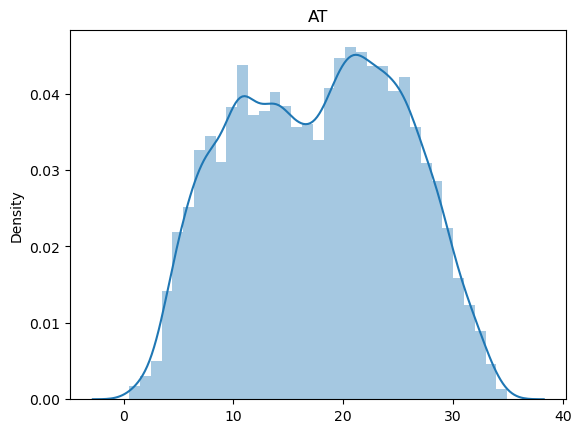

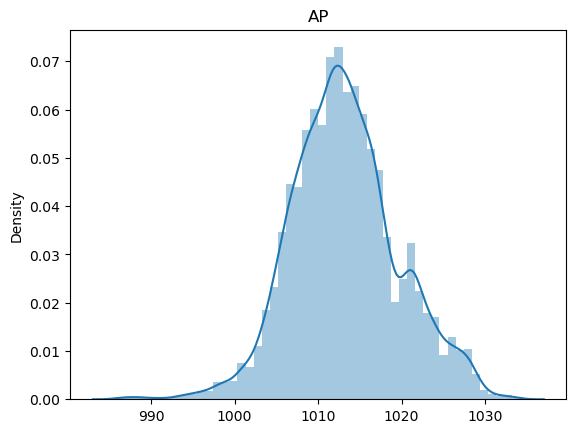

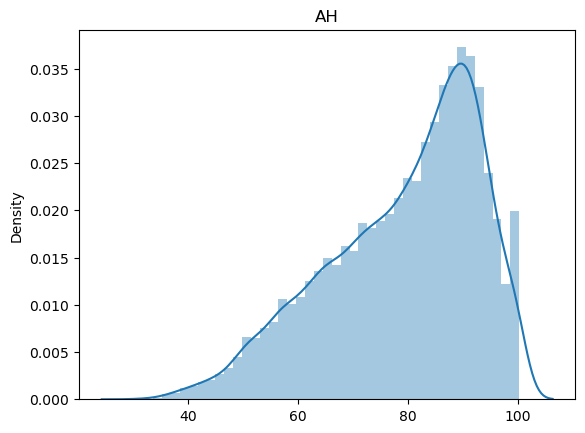

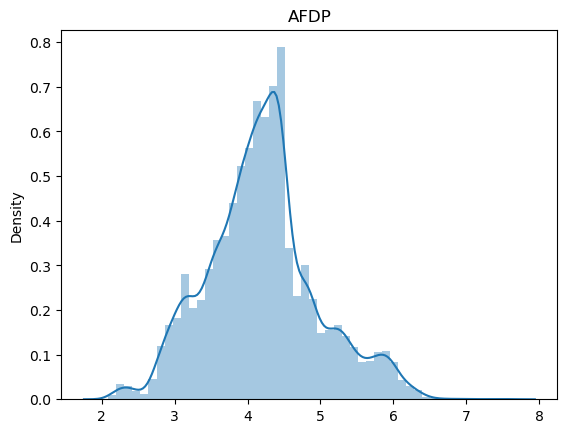

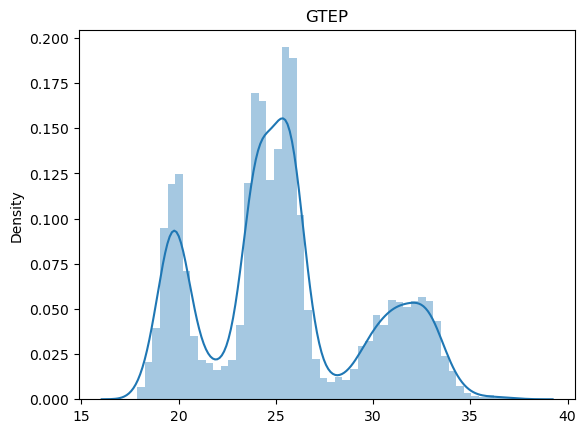

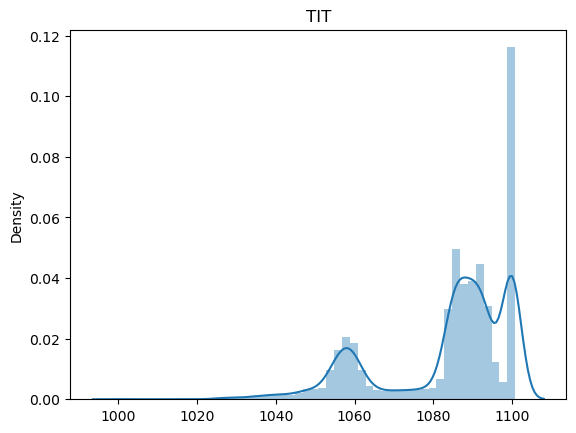

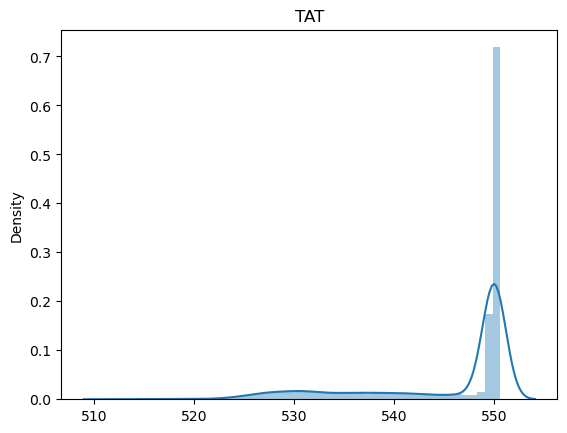

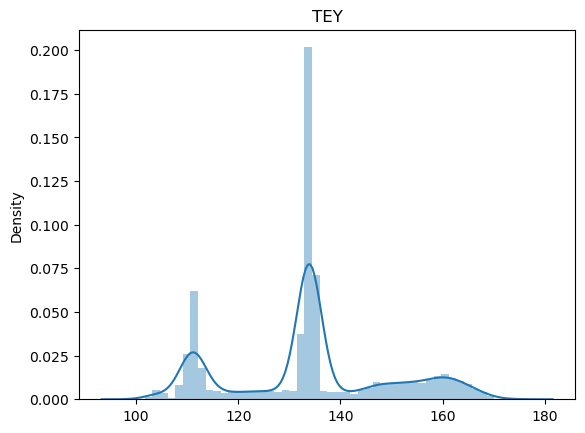

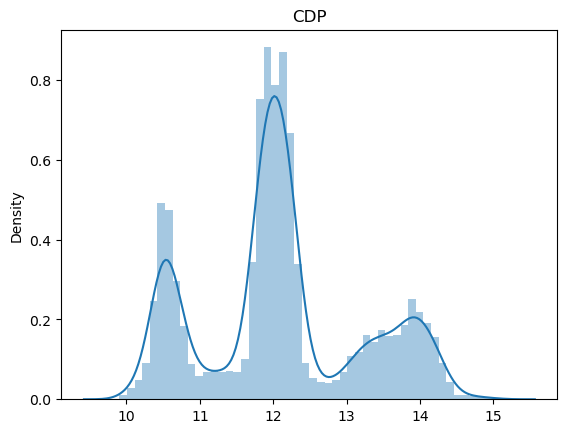

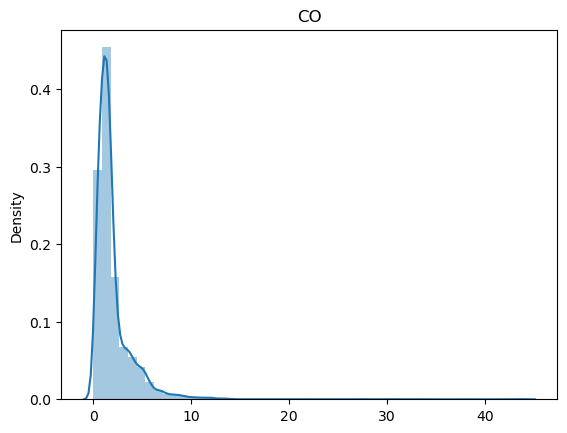

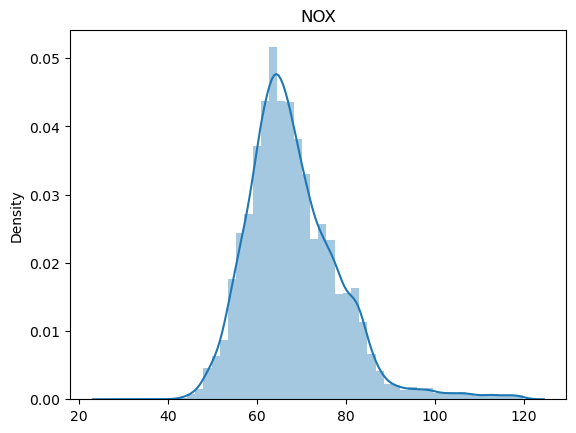

In [62]:
for feature in df:
    sns.distplot(x=df[feature])
    plt.title(feature)
    plt.show()

# Feature Engineering
- Feature Encoding
- Feature Scaling

In [63]:
df1=df.copy()

In [64]:
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [65]:
x=df1.drop('TEY', axis=1)
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [66]:
y=df1['TEY']
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [67]:
#feature Scaling
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

# Model Building

In [68]:
#Split the data into Train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20, random_state=1)

In [69]:
#Model Building

#Initialize the ANN
ann=Sequential()

#Create a Hidden Layer-1
ann.add(Dense(units=10, activation='relu'))

#Create a Hidden Layer-2
ann.add(Dense(units=10, activation='relu'))

#Create a Output Layer
ann.add(Dense(units=1, activation='linear'))

#Establist the connection between all the layers
ann.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])

#Train the ANN
ann.fit(xtrain,ytrain, epochs=100, validation_data=(xtest,ytest))

Epoch 1/100
376/376 [==============================] - 3s 4ms/step - loss: 16221.9404 - mean_absolute_percentage_error: 93.7219 - val_loss: 10778.9951 - val_mean_absolute_percentage_error: 75.2746
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 4228.1025 - mean_absolute_percentage_error: 41.1158 - val_loss: 1356.2806 - val_mean_absolute_percentage_error: 23.6674
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 764.6667 - mean_absolute_percentage_error: 17.1840 - val_loss: 515.6136 - val_mean_absolute_percentage_error: 13.7118
Epoch 4/100
376/376 [==============================] - 1s 4ms/step - loss: 397.1613 - mean_absolute_percentage_error: 11.8369 - val_loss: 363.4438 - val_mean_absolute_percentage_error: 11.1487
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 284.1007 - mean_absolute_percentage_error: 9.7518 - val_loss: 264.2374 - val_mean_absolute_percentage_error: 9.3122
Epoch 6/100
376/376 [==========

376/376 [==============================] - 1s 3ms/step - loss: 0.4693 - mean_absolute_percentage_error: 0.3702 - val_loss: 0.5290 - val_mean_absolute_percentage_error: 0.3808
Epoch 45/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4663 - mean_absolute_percentage_error: 0.3682 - val_loss: 0.4900 - val_mean_absolute_percentage_error: 0.3621
Epoch 46/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4666 - mean_absolute_percentage_error: 0.3686 - val_loss: 0.5440 - val_mean_absolute_percentage_error: 0.3838
Epoch 47/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4722 - mean_absolute_percentage_error: 0.3739 - val_loss: 0.5519 - val_mean_absolute_percentage_error: 0.3939
Epoch 48/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4652 - mean_absolute_percentage_error: 0.3666 - val_loss: 0.4959 - val_mean_absolute_percentage_error: 0.3680
Epoch 49/100
376/376 [==============================] - 1s 3ms/step - los

Epoch 88/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4376 - mean_absolute_percentage_error: 0.3562 - val_loss: 0.4869 - val_mean_absolute_percentage_error: 0.3650
Epoch 89/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4517 - mean_absolute_percentage_error: 0.3605 - val_loss: 0.4914 - val_mean_absolute_percentage_error: 0.3698
Epoch 90/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4420 - mean_absolute_percentage_error: 0.3574 - val_loss: 0.4778 - val_mean_absolute_percentage_error: 0.3554
Epoch 91/100
376/376 [==============================] - 1s 4ms/step - loss: 0.4519 - mean_absolute_percentage_error: 0.3634 - val_loss: 0.4888 - val_mean_absolute_percentage_error: 0.3629
Epoch 92/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4442 - mean_absolute_percentage_error: 0.3584 - val_loss: 0.4580 - val_mean_absolute_percentage_error: 0.3499
Epoch 93/100
376/376 [==============================] - 1s 3

In [70]:
ann.history.history

{'loss': [16221.9404296875,
  4228.1025390625,
  764.6666870117188,
  397.1612854003906,
  284.1006774902344,
  209.14031982421875,
  157.5289306640625,
  121.24466705322266,
  95.1198959350586,
  76.79415130615234,
  63.49227523803711,
  53.13548278808594,
  44.540435791015625,
  37.16313552856445,
  30.715152740478516,
  24.743776321411133,
  19.42658805847168,
  14.97758674621582,
  11.175299644470215,
  8.3496732711792,
  6.380406379699707,
  4.978551387786865,
  3.917659282684326,
  3.032668113708496,
  2.389826536178589,
  1.9000228643417358,
  1.4943878650665283,
  1.1677013635635376,
  0.9125844836235046,
  0.7349038124084473,
  0.6529185175895691,
  0.600127100944519,
  0.569091260433197,
  0.5601468086242676,
  0.5361045002937317,
  0.5254697203636169,
  0.5173542499542236,
  0.514930009841919,
  0.5028502345085144,
  0.4851015508174896,
  0.4943503737449646,
  0.4806722402572632,
  0.4797525405883789,
  0.46929728984832764,
  0.4663499593734741,
  0.4666202962398529,
  0.472

In [71]:
loss=pd.DataFrame(ann.history.history)
loss

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error
0,16221.940430,93.721886,10778.995117,75.274605
1,4228.102539,41.115795,1356.280640,23.667364
2,764.666687,17.183992,515.613586,13.711755
3,397.161285,11.836858,363.443817,11.148666
4,284.100677,9.751837,264.237366,9.312165
...,...,...,...,...
95,0.428860,0.352344,0.502938,0.365030
96,0.437380,0.356604,0.498152,0.376207
97,0.439903,0.357088,0.490873,0.371365
98,0.436445,0.355424,0.495669,0.373832


<AxesSubplot:>

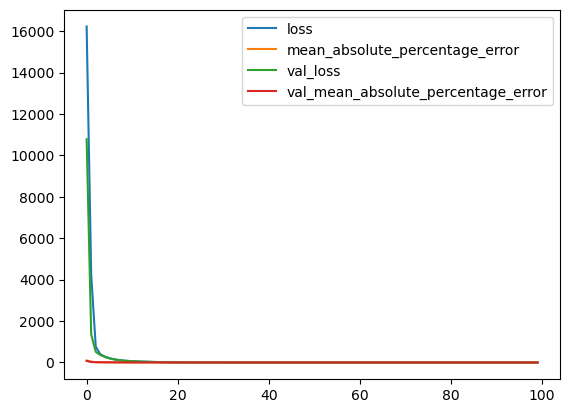

In [72]:
loss.plot()

In [73]:
ypred=ann.predict(xtest)
ypred

94/94 [==============================] - 0s 2ms/step


array([[163.8452 ],
       [140.29199],
       [109.16658],
       ...,
       [156.97945],
       [135.15378],
       [165.06418]], dtype=float32)

In [74]:
print(r2_score(ytest,ypred))

0.9981723254212499


## 1. Early Stop method

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=10)

In [77]:
#Initialize the ann

ann1 = Sequential()

#Create the hidden layer-1
ann1.add(Dense(units=10, activation='relu'))

#Create the hidden layer-2
ann1.add(Dense(units=10, activation='relu'))

#Create the o/p layer
ann1.add(Dense(units=1, activation='linear'))

#Establish the connection between all the layers
ann1.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])

#Train ANN
ann1.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=100)

Epoch 1/100
376/376 [==============================] - 3s 4ms/step - loss: 15250.9473 - mean_absolute_percentage_error: 90.7148 - val_loss: 7481.8472 - val_mean_absolute_percentage_error: 62.9907
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 2501.3865 - mean_absolute_percentage_error: 30.8134 - val_loss: 867.3802 - val_mean_absolute_percentage_error: 18.1844
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 557.5222 - mean_absolute_percentage_error: 14.1160 - val_loss: 408.5292 - val_mean_absolute_percentage_error: 11.7670
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 312.8422 - mean_absolute_percentage_error: 10.1489 - val_loss: 273.1430 - val_mean_absolute_percentage_error: 9.3864
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 212.8556 - mean_absolute_percentage_error: 8.1876 - val_loss: 192.7900 - val_mean_absolute_percentage_error: 7.7212
Epoch 6/100
376/376 [=============

376/376 [==============================] - 1s 3ms/step - loss: 0.4840 - mean_absolute_percentage_error: 0.3668 - val_loss: 0.5248 - val_mean_absolute_percentage_error: 0.3590
Epoch 45/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4784 - mean_absolute_percentage_error: 0.3652 - val_loss: 0.5312 - val_mean_absolute_percentage_error: 0.3807
Epoch 46/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4679 - mean_absolute_percentage_error: 0.3639 - val_loss: 0.5045 - val_mean_absolute_percentage_error: 0.3572
Epoch 47/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4625 - mean_absolute_percentage_error: 0.3608 - val_loss: 0.5202 - val_mean_absolute_percentage_error: 0.3720
Epoch 48/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4691 - mean_absolute_percentage_error: 0.3635 - val_loss: 0.5096 - val_mean_absolute_percentage_error: 0.3671
Epoch 49/100
376/376 [==============================] - 1s 3ms/step - los

In [78]:
early_loss=pd.DataFrame(ann1.history.history)
early_loss

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error
0,15250.947266,90.714775,7481.847168,62.990749
1,2501.386475,30.813356,867.380249,18.184410
2,557.522217,14.115992,408.529175,11.766968
3,312.842194,10.148882,273.143036,9.386369
4,212.855560,8.187593,192.790039,7.721185
...,...,...,...,...
64,0.442133,0.355064,0.501462,0.359905
65,0.434808,0.353260,0.503722,0.375497
66,0.442521,0.357930,0.501321,0.372945
67,0.429527,0.352440,0.501752,0.368465


<AxesSubplot:>

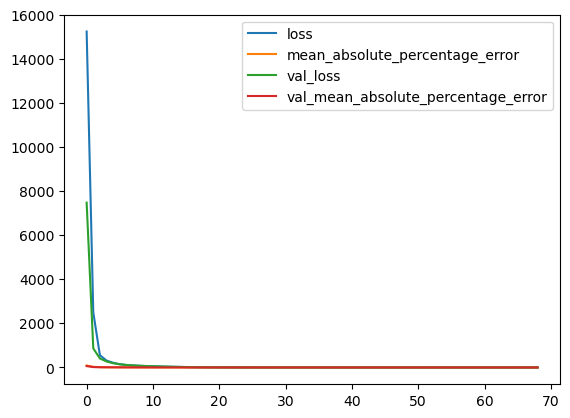

In [79]:
early_loss.plot()

In [80]:
ypred1=ann1.predict(xtest)
ypred1

94/94 [==============================] - 0s 2ms/step


array([[164.96608],
       [139.10591],
       [109.20091],
       ...,
       [157.96172],
       [135.25378],
       [165.94304]], dtype=float32)

In [81]:
print(r2_score(ytest,ypred1))

0.9974364133086522


## 2. Drop Out Layer

In [82]:
from tensorflow.keras.layers import Dropout

In [83]:
#Initialize the ann

ann2 = Sequential()

#Create the hidden layer-1
ann2.add(Dense(units=10, activation='relu'))
ann2.add(Dropout(rate=0.5))

#Create the another hidden layer-2
ann2.add(Dense(units=10, activation='relu'))
ann2.add(Dropout(rate=0.5))

#Create the o/p layer
ann2.add(Dense(units=1, activation='linear'))

#Establish the connection between all the layers
ann2.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])

#Train ANN
ann2.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)

Epoch 1/100
376/376 [==============================] - 3s 4ms/step - loss: 15824.0850 - mean_absolute_percentage_error: 92.0633 - val_loss: 9978.1221 - val_mean_absolute_percentage_error: 71.4813
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 6698.9326 - mean_absolute_percentage_error: 53.2499 - val_loss: 1942.8162 - val_mean_absolute_percentage_error: 29.2954
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 4917.2129 - mean_absolute_percentage_error: 43.7373 - val_loss: 1496.5424 - val_mean_absolute_percentage_error: 26.2666
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 4590.2510 - mean_absolute_percentage_error: 41.9002 - val_loss: 1364.9056 - val_mean_absolute_percentage_error: 25.0273
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 4302.1445 - mean_absolute_percentage_error: 40.4486 - val_loss: 1205.0513 - val_mean_absolute_percentage_error: 23.5133
Epoch 6/100
376/376 [===

376/376 [==============================] - 2s 4ms/step - loss: 1700.6152 - mean_absolute_percentage_error: 24.6999 - val_loss: 210.0251 - val_mean_absolute_percentage_error: 9.6362
Epoch 44/100
376/376 [==============================] - 2s 5ms/step - loss: 1690.9391 - mean_absolute_percentage_error: 24.5583 - val_loss: 207.2098 - val_mean_absolute_percentage_error: 9.6635
Epoch 45/100
376/376 [==============================] - 1s 4ms/step - loss: 1682.0602 - mean_absolute_percentage_error: 24.5862 - val_loss: 218.1829 - val_mean_absolute_percentage_error: 9.9848
Epoch 46/100
376/376 [==============================] - 2s 4ms/step - loss: 1689.6656 - mean_absolute_percentage_error: 24.5130 - val_loss: 243.3810 - val_mean_absolute_percentage_error: 10.3977
Epoch 47/100
376/376 [==============================] - 1s 4ms/step - loss: 1675.5768 - mean_absolute_percentage_error: 24.4900 - val_loss: 235.0797 - val_mean_absolute_percentage_error: 10.2825
Epoch 48/100
376/376 [===================

376/376 [==============================] - 1s 3ms/step - loss: 1356.4355 - mean_absolute_percentage_error: 21.8259 - val_loss: 173.6070 - val_mean_absolute_percentage_error: 8.6966
Epoch 86/100
376/376 [==============================] - 1s 4ms/step - loss: 1363.3584 - mean_absolute_percentage_error: 21.8915 - val_loss: 138.1521 - val_mean_absolute_percentage_error: 7.8475
Epoch 87/100
376/376 [==============================] - 1s 4ms/step - loss: 1334.1642 - mean_absolute_percentage_error: 21.7781 - val_loss: 173.3595 - val_mean_absolute_percentage_error: 8.6254
Epoch 88/100
376/376 [==============================] - 1s 4ms/step - loss: 1317.1320 - mean_absolute_percentage_error: 21.5702 - val_loss: 181.1079 - val_mean_absolute_percentage_error: 8.8898
Epoch 89/100
376/376 [==============================] - 1s 3ms/step - loss: 1330.0485 - mean_absolute_percentage_error: 21.6393 - val_loss: 162.5766 - val_mean_absolute_percentage_error: 8.3766
Epoch 90/100
376/376 [=====================

In [84]:
dropout_loss=pd.DataFrame(ann2.history.history)
dropout_loss

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error
0,15824.084961,92.063347,9978.122070,71.481316
1,6698.932617,53.249943,1942.816162,29.295424
2,4917.212891,43.737293,1496.542358,26.266571
3,4590.250977,41.900158,1364.905640,25.027281
4,4302.144531,40.448559,1205.051270,23.513329
...,...,...,...,...
95,1270.404419,21.129105,139.852554,7.780317
96,1291.280029,21.325478,157.825439,8.257398
97,1246.422241,20.876860,182.781723,8.840302
98,1248.661743,21.023718,180.440369,8.683768


<AxesSubplot:>

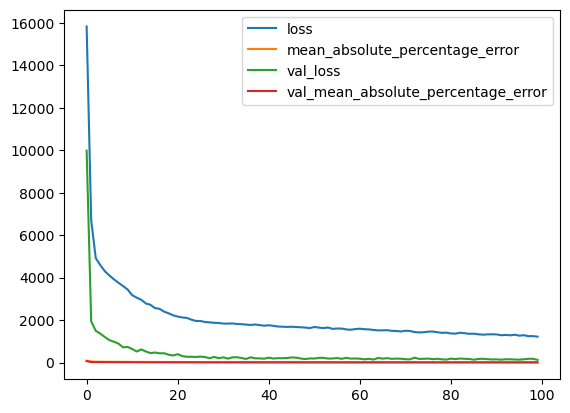

In [85]:
dropout_loss.plot()

In [86]:
ypred2=ann2.predict(xtest)

94/94 [==============================] - 0s 2ms/step


In [87]:
print(r2_score(ytest,ypred2))

0.48187010919552287


## 3.Early Stopping+Drop out Layer

In [88]:
#Initialize the ann

ann3 = Sequential()

#Create the hidden layer-1
ann3.add(Dense(units=10, activation='relu'))
ann3.add(Dropout(rate=0.5))

#Create the another hidden layer-2
ann3.add(Dense(units=10, activation='relu'))
ann3.add(Dropout(rate=0.5))

#Create the o/p layer
ann3.add(Dense(units=1, activation='linear'))

#Establish the connection between all the layers
ann3.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])

#Train ANN
ann3.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=100)

Epoch 1/100
376/376 [==============================] - 4s 6ms/step - loss: 16915.4375 - mean_absolute_percentage_error: 95.8371 - val_loss: 12582.2695 - val_mean_absolute_percentage_error: 82.6334
Epoch 2/100
376/376 [==============================] - 1s 4ms/step - loss: 8033.2446 - mean_absolute_percentage_error: 60.8969 - val_loss: 2505.3303 - val_mean_absolute_percentage_error: 35.1075
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 5355.2891 - mean_absolute_percentage_error: 46.7953 - val_loss: 1659.3652 - val_mean_absolute_percentage_error: 28.8817
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 4893.9844 - mean_absolute_percentage_error: 44.1669 - val_loss: 1489.7253 - val_mean_absolute_percentage_error: 27.5527
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 4611.4082 - mean_absolute_percentage_error: 42.7736 - val_loss: 1238.9636 - val_mean_absolute_percentage_error: 25.0758
Epoch 6/100
376/376 [==

376/376 [==============================] - 1s 3ms/step - loss: 1945.0748 - mean_absolute_percentage_error: 26.0858 - val_loss: 261.5896 - val_mean_absolute_percentage_error: 11.0506
Epoch 44/100
376/376 [==============================] - 1s 3ms/step - loss: 1902.0511 - mean_absolute_percentage_error: 25.7149 - val_loss: 245.4757 - val_mean_absolute_percentage_error: 10.6617
Epoch 45/100
376/376 [==============================] - 1s 3ms/step - loss: 1855.5452 - mean_absolute_percentage_error: 25.4601 - val_loss: 203.3316 - val_mean_absolute_percentage_error: 9.7718
Epoch 46/100
376/376 [==============================] - 1s 3ms/step - loss: 1854.9165 - mean_absolute_percentage_error: 25.5021 - val_loss: 268.5544 - val_mean_absolute_percentage_error: 11.1323
Epoch 47/100
376/376 [==============================] - 1s 3ms/step - loss: 1889.8271 - mean_absolute_percentage_error: 25.7766 - val_loss: 248.0903 - val_mean_absolute_percentage_error: 10.6713
Epoch 48/100
376/376 [=================

In [89]:
dropout_loss_early=pd.DataFrame(ann3.history.history)
dropout_loss_early

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error
0,16915.437500,95.837097,12582.269531,82.633408
1,8033.244629,60.896881,2505.330322,35.107548
2,5355.289062,46.795338,1659.365234,28.881727
3,4893.984375,44.166908,1489.725342,27.552671
4,4611.408203,42.773628,1238.963623,25.075842
5,4545.030273,42.434288,1219.066040,25.099220
6,4065.321289,39.894424,992.747253,22.354498
7,3961.720215,39.255955,910.146851,21.650507
8,3788.522217,38.286869,849.160217,21.114561
9,3566.919678,36.908970,768.494751,20.117649


<AxesSubplot:>

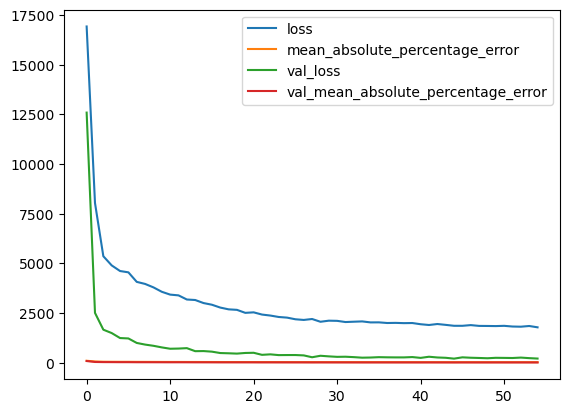

In [90]:
dropout_loss_early.plot()

In [91]:
ypred3=ann3.predict(xtest)

94/94 [==============================] - 0s 2ms/step


In [92]:
print(r2_score(ytest,ypred3))

0.1800162424375048


# Compare Performance

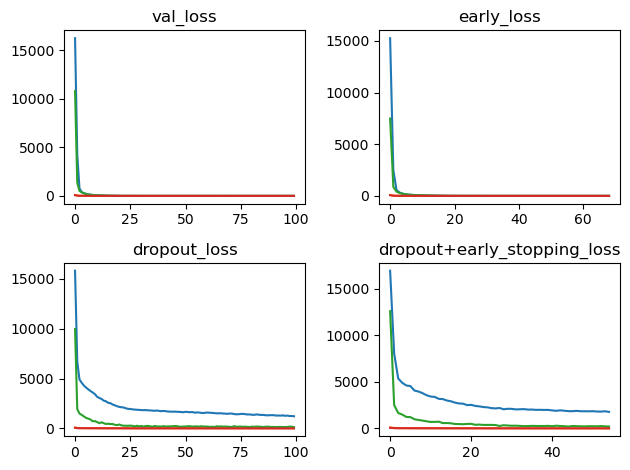

In [93]:
plt.subplot(2,2,1)
plt.plot(loss)
plt.title('val_loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('early_loss')

plt.subplot(2,2,3)
plt.plot(dropout_loss)
plt.title('dropout_loss')

plt.subplot(2,2,4)
plt.plot(dropout_loss_early)
plt.title('dropout+early_stopping_loss')

plt.tight_layout()

In [94]:
print('Accuracy with normal model:', r2_score(ytest,ypred))
print('Accuracy with Early Stop method:', r2_score(ytest,ypred1))
print('Accuracy with Drop out method:', r2_score(ytest,ypred2))
print('Accuracy with Early Stopping+Drop out method:', r2_score(ytest,ypred3))

Accuracy with normal model: 0.9981723254212499
Accuracy with Early Stop method: 0.9974364133086522
Accuracy with Drop out method: 0.48187010919552287
Accuracy with Early Stopping+Drop out method: 0.1800162424375048
